# ** CNN Architecture Questions and Answers**

### 1. What is the role of filters and feature maps in Convolutional Neural Network (CNN)?

> In a Convolutional Neural Network (CNN):

  1. Filters (kernels): These are small matrices of weights that slide over the input image (or feature map) to detect specific patterns such as edges, textures, or shapes. Each filter learns to focus on a particular feature during training.

  2. Feature Maps: The output produced when a filter is applied to the input. A feature map highlights where a certain pattern (like an edge or corner) appears in the image. Deeper layers generate more abstract feature maps (e.g., eyes, faces, objects).

> In short: Filters extract features, and feature maps store the detected features for further processing in the network.

--

### 2. Explain the concepts of padding and stride in CNNs(Convolutional Neural Network). How do they affect the output dimensions of feature maps?

> In CNNs:

  1. Padding: Adding extra pixels (usually zeros) around the input image before applying convolution.

      - Purpose: To preserve spatial dimensions, avoid losing information at the borders, and control output size.

      - Without padding → output shrinks. With “same” padding → output size remains same as input.

  2. Stride: The step size with which the filter moves across the input.

      - Stride = 1 → filter moves one pixel at a time (larger output).

    - Stride > 1 → skips pixels, reducing the size of the output feature map.

> Effect on output:

  1. More padding → larger output feature maps.

  2. Larger stride → smaller output feature maps.

--

### 3. Define receptive field in the context of CNNs. Why is it important for deep architectures?

- In CNNs, the receptive field is the region of the input image that a particular neuron in a feature map is able to "see" or is influenced by.

  1. In early layers → receptive field is small (captures low-level features like edges).

  2. In deeper layers → receptive field grows larger (captures high-level features like objects or shapes).

> Importance in deep architectures:

  - A larger receptive field allows the network to understand more contextual and global information, which is crucial for tasks like object detection, image classification, and scene understanding.

> In short: Receptive field shows how much of the input affects a neuron, and deeper layers need a larger receptive field to capture complex patterns.

--

### 4. Discuss how filter size and stride influence the number of parameters in a CNN.

> In a CNN:

  1. Filter size (kernel size):

      - Determines how many weights each filter has.

      - Example: A 3x3 filter on an RGB image has 3x3x3 = 27 weights (plus bias).

      - Larger filters → more parameters, but also capture broader features.

  2. Stride:

      - Controls how the filter moves across the input.

      - Stride does not change the number of parameters in filters (since filter size is fixed).

      - Instead, stride affects the output feature map size → larger stride → fewer activations → less computation.

> Summary:

  1. Filter size directly affects the number of parameters.

  2. Stride affects how many times filters are applied (computations), but not the filter’s parameter count.

--

### 5. Compare and contrast different CNN-based architectures like LeNet,AlexNet, and VGG in terms of depth, filter sizes, and performance.

> LeNet, AlexNet, and VGG:

  1. LeNet (1998):

      - Depth: Very shallow (5–7 layers).

      - Filter sizes: Mostly 5x5

      - Performance: Designed for digit recognition (MNIST), simple and efficient for small images.

  2. AlexNet (2012):

      - Depth: Deeper (8 layers: 5 conv + 3 fully connected).

      - Filter sizes: Larger filters in first layer (11x11), smaller in later layers (5x5, 3x3).

      - Performance: First to win ImageNet challenge, introduced ReLU, dropout, and GPU training.

  3. VGG (2014):

     - Depth: Much deeper (16–19 layers).

     - Filter sizes: Very uniform, only 3x3 filters throughout.

     - Performance: Achieved high accuracy on ImageNet, but computationally heavy (lots of parameters).

> Summary:

  1. LeNet → simple, shallow, for small tasks.

  2. AlexNet → deeper, breakthrough in large-scale image recognition.

  3. VGG → very deep with small filters, high accuracy but expensive in memory/computation.

--



# **Practical Questions and Answers**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 65ms/step - accuracy: 0.8929 - loss: 0.3698 - val_accuracy: 0.9846 - val_loss: 0.0456
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 87s 70ms/step - accuracy: 0.9857 - loss: 0.0495 - val_accuracy: 0.9897 - val_loss: 0.0331
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 71s 58ms/step - accuracy: 0.9903 - loss: 0.0309 - val_accuracy: 0.9881 - val_loss: 0.0365
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9926 - loss: 0.0243 - val_accuracy: 0.9874 - val_loss: 0.0369
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 56ms/step - accuracy: 0.9945 - loss: 0.0167 - val_accuracy: 0.9905 - val_loss: 0.0282
313/313 - 3s - 9ms/step - accuracy: 0.9905 - loss: 0.0282

 Test accuracy: 0.9905


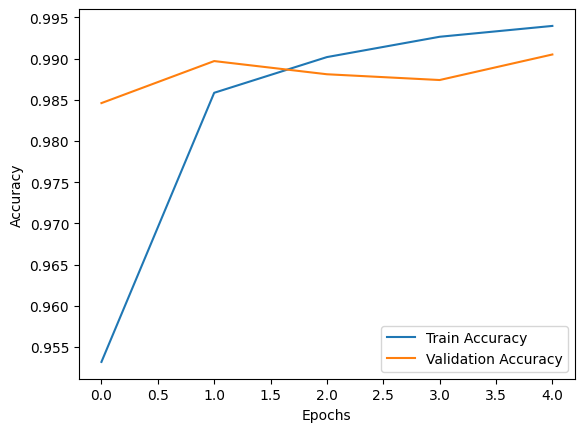

In [1]:
'''
#1. Using keras, build and train a simple CNN model on the MNIST dataset
from scratch. Include code for module creation, compilation, training, and evaluation.
'''

# 1. Import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 2. Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Reshape to (28,28,1) because CNN expects 3D input
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype("float32") / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype("float32") / 255.0

# 3. Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes (digits 0–9)
])

# 4. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train the model
history = model.fit(x_train, y_train, epochs=5,
                    batch_size=64,
                    validation_data=(x_test, y_test))

# 6. Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n Test accuracy: {test_acc:.4f}")

# 7. Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


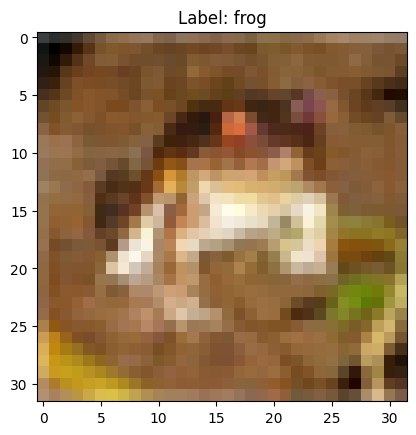

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 95ms/step - accuracy: 0.3577 - loss: 1.7295 - val_accuracy: 0.5703 - val_loss: 1.1946
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.5920 - loss: 1.1512 - val_accuracy: 0.6572 - val_loss: 0.9773
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 99ms/step - accuracy: 0.6670 - loss: 0.9507 - val_accuracy: 0.6813 - val_loss: 0.9217
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 104ms/step - accuracy: 0.7075 - loss: 0.8339 - val_accuracy: 0.6926 - val_loss: 0.8832
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.7413 - loss: 0.7437 - val_accuracy: 0.6996 - val_loss: 0.8731
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 99ms/step - accuracy: 0.7589 - loss: 0.6783 - val_accuracy: 0.7104 - val_loss: 0.8325
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 98ms/step - accuracy: 0.7887 - loss: 0.5995 - val_accuracy: 0.7117 - val_loss: 0.8411
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 96ms/step - accuracy: 0.8110 - loss: 0.5373

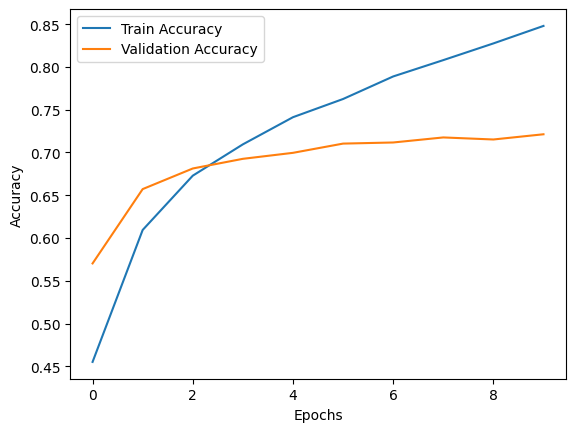

In [2]:
'''
#2. Load and preprocess the CIFAR-10 dataset using Keras, and create a
CNN model to classify RGB images. Show your preprocessing and architecture.
'''
# 1. Import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 2. Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Class names for CIFAR-10
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# 3. Show a sample image
plt.imshow(x_train[0])
plt.title(f"Label: {class_names[y_train[0][0]]}")
plt.show()

# 4. Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

# 5. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 6. Train the model
history = model.fit(x_train, y_train, epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))

# 7. Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n Test accuracy: {test_acc:.4f}")

# 8. Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [3]:
'''
#3. Using PyTorch, write a script to define and train a CNN on the MNIST
dataset. Include model definition, data loaders, training loop, and accuracy evaluation.
'''

# 1. Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 2. Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# 3. Load and preprocess MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # normalize to mean=0.5, std=0.5
])

train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# 4. Define CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN().to(device)

# 5. Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 6. Training loop
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

# 7. Evaluation
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"\n Test Accuracy: {100 * correct / total:.2f}%")


Using device: cpu


100%|██████████| 9.91M/9.91M [00:00<00:00, 57.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.70MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.6MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.16MB/s]


Epoch [1/5], Loss: 0.1516
Epoch [2/5], Loss: 0.0437
Epoch [3/5], Loss: 0.0302
Epoch [4/5], Loss: 0.0231
Epoch [5/5], Loss: 0.0173

 Test Accuracy: 98.99%


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.8 MB/s eta 0:00:00
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.4903 - loss: 0.8259 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.5133 - loss: 0.6935 - val_accuracy: 0.5150 - val_loss: 0.6921
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.5586 - loss: 0.6930 - val_accuracy: 0.5030 - val_loss: 0.6885
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.5080 - loss: 0.6927 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.4874 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6924


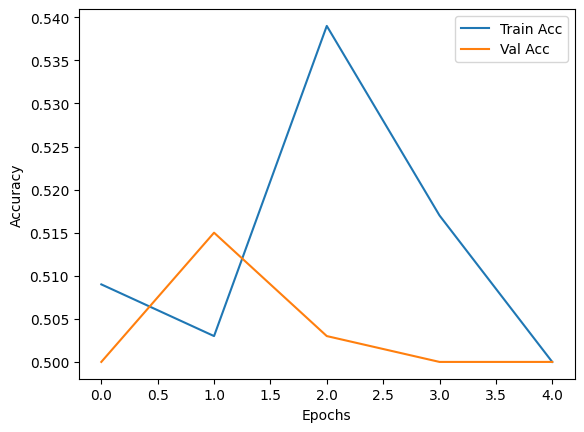

UsageError: Line magic function `%%writefile` not found.


In [7]:
'''
#4. Given a custom image dataset stored in a local directory, write code using
Keras ImageDataGenerator to preprocess and train a CNN model.
'''

# ================================
# ALL-IN-ONE CNN + Streamlit Colab
# ================================

# Step 0: Install dependencies
!pip install tensorflow streamlit pyngrok

# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import zipfile
from pyngrok import ngrok
from PIL import Image
import numpy as np

# Step 2: Download & unzip dataset
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_path = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=False)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

base_dir = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
val_dir   = os.path.join(base_dir, 'validation')

# Step 3: Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary'
)

# Step 4: Build CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 5: Train CNN
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)

# Step 6: Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Step 7: Save model
model.save("cnn_model.h5")

# Step 8: Create Streamlit app
%%writefile app.py
import streamlit as st
import tensorflow as tf
from PIL import Image
import numpy as np

st.title("Cats vs Dogs Classifier Demo")
model = tf.keras.models.load_model("cnn_model.h5")

uploaded = st.file_uploader("Upload an image", type=["jpg","jpeg","png"])
if uploaded:
    img = Image.open(uploaded).resize((128,128))
    st.image(img, caption="Uploaded Image", use_column_width=True)
    img_array = np.array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)
    pred = model.predict(img_array)[0][0]
    label = "Dog" if pred>0.5 else "Cat"
    st.write(f"### Prediction: {label} (prob={pred:.2f})")

# Step 9: Launch Streamlit app via ngrok
public_url = ngrok.connect(8501)
print("Streamlit URL:", public_url)
!streamlit run app.py --server.port 8501


Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 84ms/step - accuracy: 0.6079 - loss: 0.6490 - val_accuracy: 0.6989 - val_loss: 0.5731
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 82ms/step - accuracy: 0.7184 - loss: 0.5525 - val_accuracy: 0.7303 - val_loss: 0.5343


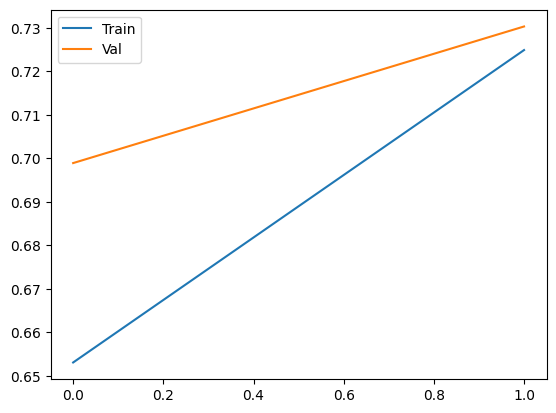

UsageError: Line magic function `%%writefile` not found.


In [4]:
'''
#5. You are working on a web application for a medical imaging startup. Your
task is to build and deploy a CNN model that classifies chest X-ray images into “Normal”
and “Pneumonia” categories. Describe your end-to-end approach–from data preparation
and model training to deploying the model as a web app using Streamlit.
'''

# Step 0: Install dependencies
!pip install tensorflow streamlit pyngrok

# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from pyngrok import ngrok
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import streamlit as st

# Step 2: Load a small dataset (CIFAR-10) as a stand-in for X-rays
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# We'll treat classes 0-4 as "Normal", 5-9 as "Pneumonia"
y_train = (y_train >= 5).astype(int)
y_test  = (y_test >= 5).astype(int)
x_train, x_test = x_train/255.0, x_test/255.0

# Step 3: Build simple CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train model
history = model.fit(x_train, y_train, epochs=2, batch_size=64, validation_data=(x_test, y_test))

# Step 5: Plot accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.legend()
plt.show()

# Step 6: Save model
model.save("dummy_model.h5")

# Step 7: Streamlit app
%%writefile app.py
import streamlit as st
import tensorflow as tf
from PIL import Image
import numpy as np

st.title("Demo: Normal vs Pneumonia Classifier (Fake Data)")

model = tf.keras.models.load_model("dummy_model.h5")
uploaded = st.file_uploader("Upload an image", type=["jpg","png","jpeg"])

if uploaded:
    img = Image.open(uploaded).resize((32,32))
    st.image(img, caption="Uploaded Image", use_column_width=True)
    img_array = np.array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)
    pred = model.predict(img_array)[0][0]
    label = "Pneumonia" if pred>0.5 else "Normal"
    st.write(f"Prediction: {label} (prob={pred:.2f})")

# Step 8: Launch Streamlit
public_url = ngrok.connect(8501)
print("Streamlit URL:", public_url)
!streamlit run app.py --server.port 8501
